In [2]:
#importing libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

#from keras.appliations.vgg16 import VGG16

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [3]:
#re-size all the images 

IMAGE_SIZE=[224,224]

train_path="/content/drive/MyDrive/DL_Projects/Car_brand_using_Resnet50/Train"
test_path="/content/drive/MyDrive/DL_Projects/Car_brand_using_Resnet50/Test"

In [4]:
## Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
resnet= ResNet50(input_shape=IMAGE_SIZE +[3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 4s 0us/step


In [5]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
#dont train existing weights
for layer in resnet.layers:
  layer.trainable=False

In [7]:
# useful for getting number of output classes

folders= glob("/content/drive/MyDrive/DL_Projects/Car_brand_using_Resnet50/Train/audi")

In [8]:

folders

['/content/drive/MyDrive/DL_Projects/Car_brand_using_Resnet50/Train/audi']

In [9]:
#flatten layers
x= Flatten()(resnet.output)

In [10]:
prediction= Dense(3, activation='softmax')(x)


#create a model object
model= Model(inputs=resnet.input, outputs=prediction)

In [11]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
#tell model what cost and optimization method to use

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
# use imagedata generator to import the images from dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip= True
)
 
#in test data should not do data agumentation
test_datagen= ImageDataGenerator(rescale=1./255)

In [14]:
training_set= train_datagen.flow_from_directory('/content/drive/MyDrive/DL_Projects/Car_brand_using_Resnet50/Train' , 
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 64 images belonging to 3 classes.


In [15]:
testing_set= train_datagen.flow_from_directory('/content/drive/MyDrive/DL_Projects/Car_brand_using_Resnet50/Test' , 
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 58 images belonging to 3 classes.


In [16]:
#fit them model
#run the cell it will take some time to exexute

r= model.fit_generator(
    training_set,
    validation_data= testing_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 43s 21s/step - loss: 2.1906 - accuracy: 0.4375 - val_loss: 3.7206 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 525ms/step - loss: 6.9816 - accuracy: 0.3906 - val_loss: 4.7587 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 1s 533ms/step - loss: 5.2151 - accuracy: 0.4688 - val_loss: 2.9791 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 1s 527ms/step - loss: 2.8012 - accuracy: 0.4062 - val_loss: 6.4686 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 1s 529ms/step - loss: 3.7040 - accuracy: 0.4062 - val_loss: 1.4153 - val_accuracy: 0.5517
Epoch 6/50
2/2 [==============================] - 1s 532ms/step - loss: 1.1316 - accuracy: 0.5938 - val_loss: 1.8471 - val_accuracy: 0.4310
Epoch 7/50
2/2 [==============================] - 1s 524ms/step - loss: 2.7968 - accu

In [17]:
##if validation accuarcy is less than 50 then overfitting

In [19]:
r.history

{'accuracy': [0.4375,
  0.390625,
  0.46875,
  0.40625,
  0.40625,
  0.59375,
  0.515625,
  0.5625,
  0.625,
  0.515625,
  0.625,
  0.578125,
  0.71875,
  0.609375,
  0.75,
  0.703125,
  0.78125,
  0.796875,
  0.765625,
  0.765625,
  0.84375,
  0.765625,
  0.890625,
  0.828125,
  0.875,
  0.796875,
  0.859375,
  0.859375,
  0.828125,
  0.890625,
  0.84375,
  0.875,
  0.90625,
  0.921875,
  0.9375,
  0.953125,
  0.921875,
  0.953125,
  0.953125,
  0.953125,
  0.921875,
  0.921875,
  0.953125,
  0.953125,
  0.96875,
  0.9375,
  0.953125,
  0.9375,
  0.9375,
  0.921875],
 'loss': [2.190640926361084,
  6.981606483459473,
  5.215143203735352,
  2.8011999130249023,
  3.7040319442749023,
  1.1316334009170532,
  2.7967584133148193,
  1.5449455976486206,
  1.0331947803497314,
  1.1667793989181519,
  1.0856093168258667,
  1.2953433990478516,
  0.5903037786483765,
  1.0034312009811401,
  0.5780004262924194,
  0.6012279987335205,
  0.5272416472434998,
  0.488519549369812,
  0.42994558811187744,
  

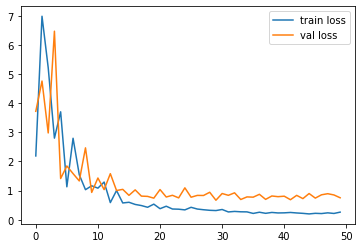

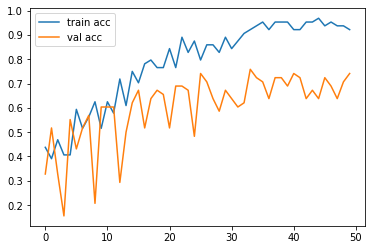

<Figure size 432x288 with 0 Axes>

In [21]:
##plotting losss

plt.plot(r.history['loss'], label='train loss')

plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('lossval_loss')

#plot accuarcy

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
## saving model

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [23]:
y_pred= model.predict(testing_set)

In [24]:
y_pred

array([[1.43654766e-02, 1.29915327e-01, 8.55719149e-01],
       [2.73234099e-01, 3.45632195e-01, 3.81133705e-01],
       [2.17108026e-01, 7.42465138e-01, 4.04268019e-02],
       [1.67722091e-01, 7.57246494e-01, 7.50313476e-02],
       [7.23569561e-03, 9.36799228e-01, 5.59650622e-02],
       [4.26704958e-02, 9.52161133e-01, 5.16839419e-03],
       [2.08922978e-02, 9.46995795e-01, 3.21118534e-02],
       [8.51191819e-01, 1.31626427e-01, 1.71817001e-02],
       [3.33855301e-01, 5.85127413e-01, 8.10173228e-02],
       [3.10266614e-02, 9.41076875e-01, 2.78964452e-02],
       [1.30637035e-01, 4.89769518e-01, 3.79593402e-01],
       [3.58497314e-02, 9.30561483e-01, 3.35887782e-02],
       [8.43166094e-03, 9.77718771e-01, 1.38495686e-02],
       [1.03639230e-01, 1.83538208e-03, 8.94525409e-01],
       [1.64335907e-01, 3.27737838e-01, 5.07926226e-01],
       [1.90967426e-01, 6.51639640e-01, 1.57393008e-01],
       [6.99828088e-01, 3.48326191e-02, 2.65339285e-01],
       [2.70765811e-01, 7.56924

In [25]:
 import numpy as np
 y_pred= np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('model_resnet50.h5')

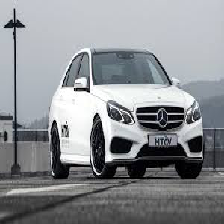

In [32]:
 img=image.load_img('/content/drive/MyDrive/DL_Projects/Car_brand_using_Resnet50/Test/mercedes/31.jpg', target_size=(224,224))
 img

In [33]:
x=image.img_to_array(img)
x

array([[[196., 199., 204.],
        [196., 199., 204.],
        [196., 199., 204.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       [[196., 199., 204.],
        [196., 199., 204.],
        [196., 199., 204.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       [[196., 199., 204.],
        [196., 199., 204.],
        [196., 199., 204.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       ...,

       [[ 37.,  37.,  37.],
        [ 32.,  32.,  32.],
        [ 30.,  30.,  30.],
        ...,
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.]],

       [[ 37.,  37.,  37.],
        [ 32.,  32.,  32.],
        [ 30.,  30.,  30.],
        ...,
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.]],

       [[ 42.,  42.,  42.],
        [ 36.,  36.,  36.],
        [ 34.,  

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
x

array([[[0.76862746, 0.78039217, 0.8       ],
        [0.76862746, 0.78039217, 0.8       ],
        [0.76862746, 0.78039217, 0.8       ],
        ...,
        [0.76862746, 0.78039217, 0.80784315],
        [0.76862746, 0.78039217, 0.80784315],
        [0.76862746, 0.78039217, 0.80784315]],

       [[0.76862746, 0.78039217, 0.8       ],
        [0.76862746, 0.78039217, 0.8       ],
        [0.76862746, 0.78039217, 0.8       ],
        ...,
        [0.76862746, 0.78039217, 0.80784315],
        [0.76862746, 0.78039217, 0.80784315],
        [0.76862746, 0.78039217, 0.80784315]],

       [[0.76862746, 0.78039217, 0.8       ],
        [0.76862746, 0.78039217, 0.8       ],
        [0.76862746, 0.78039217, 0.8       ],
        ...,
        [0.76862746, 0.78039217, 0.80784315],
        [0.76862746, 0.78039217, 0.80784315],
        [0.76862746, 0.78039217, 0.80784315]],

       ...,

       [[0.14509805, 0.14509805, 0.14509805],
        [0.1254902 , 0.1254902 , 0.1254902 ],
        [0.11764706, 0

In [37]:
 x=np.expand_dims(x, axis=0)
 img_data= preprocess_input(x)
 img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

array([[0.05127717, 0.00104816, 0.9476747 ]], dtype=float32)

In [40]:
a= np.argmax(model.predict(img_data), axis=1)

In [41]:
a

array([2])